## Import Libraries

In [1]:
import pandas as pd
import numpy as np
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.layers import Dense
from tensorflow.keras import Sequential
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.metrics import classification_report, confusion_matrix

## Import dataset

In [2]:
data=pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Final Project/heart.csv')

In [3]:
data.head()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 918 entries, 0 to 917
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Age             918 non-null    int64  
 1   Sex             918 non-null    object 
 2   ChestPainType   918 non-null    object 
 3   RestingBP       918 non-null    int64  
 4   Cholesterol     918 non-null    int64  
 5   FastingBS       918 non-null    int64  
 6   RestingECG      918 non-null    object 
 7   MaxHR           918 non-null    int64  
 8   ExerciseAngina  918 non-null    object 
 9   Oldpeak         918 non-null    float64
 10  ST_Slope        918 non-null    object 
 11  HeartDisease    918 non-null    int64  
dtypes: float64(1), int64(6), object(5)
memory usage: 86.2+ KB


In [5]:
data.describe()

,Age,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak,HeartDisease
count,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000
mean,53.510893,132.396514,198.799564,0.233115,136.809368,0.887364,0.553377
std,9.432617,18.514154,109.384145,0.423046,25.460334,1.066570,0.497414
min,28.000000,0.000000,0.000000,0.000000,60.000000,-2.600000,0.000000
25%,47.000000,120.000000,173.250000,0.000000,120.000000,0.000000,0.000000
50%,54.000000,130.000000,223.000000,0.000000,138.000000,0.600000,1.000000
75%,60.000000,140.000000,267.000000,0.000000,156.000000,1.500000,1.000000
max,77.000000,200.000000,603.000000,1.000000,202.000000,6.200000,1.000000


The target column will be HeartDisease

## Encode categorical data

In [6]:
from sklearn.preprocessing import LabelEncoder
LE = LabelEncoder()
data['Sex']=LE.fit_transform(data[['Sex']])
data['ChestPainType']=LE.fit_transform(data[['ChestPainType']])
data['RestingECG']=LE.fit_transform(data[['RestingECG']])
data['ST_Slope']=LE.fit_transform(data[['ST_Slope']])
data['ExerciseAngina']=LE.fit_transform(data[['ExerciseAngina']])
     

/usr/local/lib/python3.8/dist-packages/sklearn/preprocessing/_label.py:115: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 918 entries, 0 to 917
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Age             918 non-null    int64  
 1   Sex             918 non-null    int64  
 2   ChestPainType   918 non-null    int64  
 3   RestingBP       918 non-null    int64  
 4   Cholesterol     918 non-null    int64  
 5   FastingBS       918 non-null    int64  
 6   RestingECG      918 non-null    int64  
 7   MaxHR           918 non-null    int64  
 8   ExerciseAngina  918 non-null    int64  
 9   Oldpeak         918 non-null    float64
 10  ST_Slope        918 non-null    int64  
 11  HeartDisease    918 non-null    int64  
dtypes: float64(1), int64(11)
memory usage: 86.2 KB


## Split the data into X and y

In [8]:
X=data.drop('HeartDisease', axis=1)
y=data['HeartDisease']

## Scale data

In [9]:
from sklearn.preprocessing import StandardScaler
sc_x=StandardScaler()
#sc_y=StandardScaler()
X=sc_x.fit_transform(X)
#y=sc_y.fit_transform(y)

#feature normalization
#X =  keras.utils.normalize(X.values)
print(X)

[[-1.4331398   0.51595242  0.22903206 ... -0.8235563  -0.83243239
   1.05211381]
 [-0.47848359 -1.93816322  1.27505906 ... -0.8235563   0.10566353
  -0.59607813]
 [-1.75135854  0.51595242  0.22903206 ... -0.8235563  -0.83243239
   1.05211381]
 ...
 [ 0.37009972  0.51595242 -0.81699495 ...  1.21424608  0.29328271
  -0.59607813]
 [ 0.37009972 -1.93816322  0.22903206 ... -0.8235563  -0.83243239
  -0.59607813]
 [-1.64528563  0.51595242  1.27505906 ... -0.8235563  -0.83243239
   1.05211381]]


## Train test split

In [10]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2, random_state=0) 

## ANN model

In [17]:
#get number of columns in training data
n_cols = X_train.shape[1]

# builds model
model = Sequential()

model.add(Dense(150, activation='relu', 
                       input_shape=(n_cols,)))
model.add(Dense(150, activation='relu'))
model.add(Dense(150, activation='relu'))
model.add(Dense(1))

#compile model
model.compile(loss='mse', optimizer='adam', metrics=['accuracy']) # use metric as mean absolute error
#inspect the model
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_8 (Dense)             (None, 150)               1800      
                                                                 
 dense_9 (Dense)             (None, 150)               22650     
                                                                 
 dense_10 (Dense)            (None, 150)               22650     
                                                                 
 dense_11 (Dense)            (None, 1)                 151       
                                                                 
Total params: 47,251
Trainable params: 47,251
Non-trainable params: 0
_________________________________________________________________


In [19]:
from keras.callbacks import EarlyStopping
#train model and perform validation test

early_stop = EarlyStopping(monitor='val_accuracy', patience=30) # stops training when it doesn't show improvemnet.

history = model.fit(X_train, y_train, epochs=100, validation_split=0.2, verbose=1, callbacks=[early_stop])

Epoch 1/100
19/19 [==============================] - 0s 7ms/step - loss: 0.0049 - accuracy: 1.0000 - val_loss: 0.1497 - val_accuracy: 0.8367
Epoch 2/100
19/19 [==============================] - 0s 5ms/step - loss: 0.0062 - accuracy: 0.9983 - val_loss: 0.1588 - val_accuracy: 0.8435
Epoch 3/100
19/19 [==============================] - 0s 5ms/step - loss: 0.0089 - accuracy: 0.9983 - val_loss: 0.1567 - val_accuracy: 0.8299
Epoch 4/100
19/19 [==============================] - 0s 4ms/step - loss: 0.0064 - accuracy: 1.0000 - val_loss: 0.1499 - val_accuracy: 0.8299
Epoch 5/100
19/19 [==============================] - 0s 4ms/step - loss: 0.0054 - accuracy: 1.0000 - val_loss: 0.1510 - val_accuracy: 0.8163
Epoch 6/100
19/19 [==============================] - 0s 5ms/step - loss: 0.0055 - accuracy: 0.9983 - val_loss: 0.1572 - val_accuracy: 0.8163
Epoch 7/100
19/19 [==============================] - 0s 7ms/step - loss: 0.0050 - accuracy: 1.0000 - val_loss: 0.1462 - val_accuracy: 0.8299
Epoch 8/100
1

## Analyze model

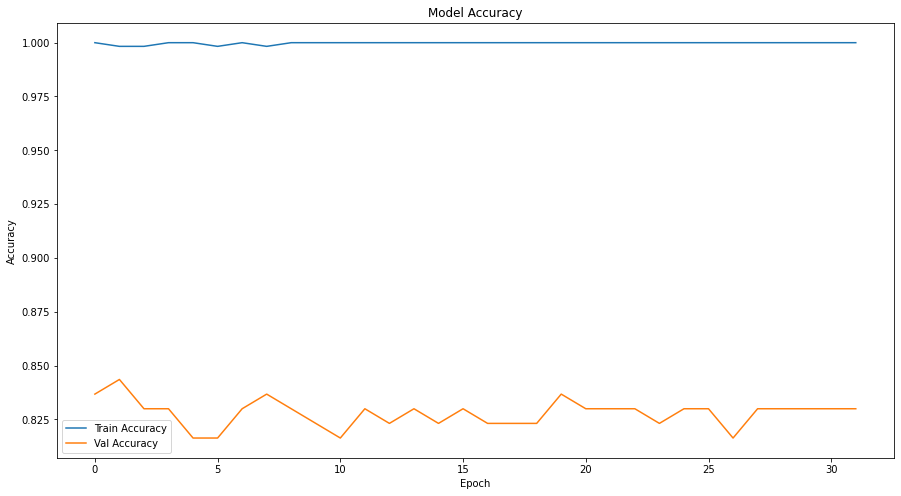

In [20]:
# show the graph of model loss in trainig and validation 

plt.figure(figsize=(15,8))
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.plot(history.epoch, history.history['accuracy'],
           label='Train Accuracy')
plt.plot(history.epoch, history.history['val_accuracy'],
           label = 'Val Accuracy')
plt.title('Model Accuracy')
plt.legend()

In [21]:
#nn_score = model.evaluate(X_test, y_test, verbose=1)
#print('loss value: ', nn_score[0]) #MSE
#print('Mean absolute error: ', nn_score[1])
loss, acc = model.evaluate(X_test, y_test, verbose = 2)
print(f'Loss: {loss}')
print(f'Accuracy: {acc}')

6/6 - 0s - loss: 0.1476 - accuracy: 0.8261 - 24ms/epoch - 4ms/step
Loss: 0.14760184288024902
Accuracy: 0.8260869383811951


## Save model

In [ ]:
##model.save("/content/drive/MyDrive/Colab Notebooks/Final Project/saved_models/my_model")

## Predict Value

In [22]:
'''=== predict the heart disease ==='''

# predict house price using the test data 
test_predictions = model.predict(X_test).flatten()

6/6 [==============================] - 0s 2ms/step


In [23]:
# show the true value and predicted value in dataframe
true_predicted = pd.DataFrame(list(zip(y_test, test_predictions)), 
                    columns=['True Value','Predicted Value'])
true_predicted.sample(10)

,True Value,Predicted Value
103,1,1.284636
170,1,0.921927
179,1,0.597413
32,0,0.631035
63,0,0.155081
98,0,0.120467
69,0,0.090526
171,1,1.044791
153,0,0.021264
127,1,0.411856


## Logistic Regresssion

In [24]:
log_reg = LogisticRegression()
log_reg.fit(X_train, y_train)

LogisticRegression()

In [25]:
log_score=log_reg.score(X_test, y_test)
log_score

0.8315217391304348

## Random Forest Classifier

In [26]:
rfc=RandomForestClassifier()
rfc.fit(X_train, y_train)

RandomForestClassifier()

In [27]:
rfc.score(X_train, y_train)

1.0

In [28]:
rfc_score=rfc.score(X_test, y_test)
rfc_score

0.8532608695652174

## Decision Tree Classifier

In [29]:
dtc=DecisionTreeClassifier()
dtc.fit(X_train, y_train)

DecisionTreeClassifier()

In [30]:
dtc.score(X_train, y_train)

1.0

In [32]:
dtc_score=dtc.score(X_test, y_test)
dtc_score

0.7391304347826086

## SVM Classifier

In [33]:
svc= SVC(kernel='rbf')
svc.fit(X_train, y_train)

SVC()

In [34]:
svc.score(X_train, y_train)

0.9059945504087193

In [35]:
svc_score=svc.score(X_test, y_test)
svc_score

0.8641304347826086

## Display Scores

In [36]:
scores_data = { 'NN Score': [acc], 'LR Score': [log_score], 'RF Score': [rfc_score], 'DT Score': [dtc_score], 'SVC Score': [svc_score] }
scores_table=pd.DataFrame(scores_data)
print(scores_table)

   NN Score  LR Score  RF Score  DT Score  SVC Score
0  0.826087  0.831522  0.853261   0.73913    0.86413


Best model was SVC: 0.86413
<br />


## Display Predictions

In [37]:
y_pred_log=log_reg.predict(X_test)
y_pred_rfc=rfc.predict(X_test)
y_pred_dtc=dtc.predict(X_test)
y_pred_svc=svc.predict(X_test)

In [38]:
table = pd.DataFrame(list(zip(y_test, test_predictions,y_pred_log, y_pred_rfc, y_pred_dtc, y_pred_svc)), 
                    columns=['True Value','Predicted Value_NN', 'Predicted Value_LR', 'Predicted Value_RF', 'Predicted Value_DT', 'Predicted Value_SVC'])
table.sample(10)

,True Value,Predicted Value_NN,Predicted Value_LR,Predicted Value_RF,Predicted Value_DT,Predicted Value_SVC
168,1,0.691649,1,1,1,1
101,1,0.979655,0,1,1,1
31,0,0.056755,0,0,0,0
40,0,0.046185,0,0,0,0
148,1,0.928432,0,1,0,1
139,0,0.041627,0,0,0,0
114,1,0.994895,1,1,1,1
178,0,-0.124633,0,0,0,0
157,1,1.015360,1,1,0,1
129,1,0.900737,1,1,1,1


In [39]:
table.sample(10)

,True Value,Predicted Value_NN,Predicted Value_LR,Predicted Value_RF,Predicted Value_DT,Predicted Value_SVC
66,1,0.992243,1,1,1,1
169,1,0.817050,1,1,1,1
16,1,0.608926,1,1,0,1
21,1,0.805918,1,1,1,1
50,1,0.305242,1,1,0,1
112,0,0.898872,0,1,1,1
19,0,-0.004180,0,0,0,0
4,0,0.025654,0,0,1,0
9,0,0.026803,0,0,0,0
121,1,0.249350,1,0,1,1


## Classification Report and Confusion Matrix

#### SVC

In [40]:
print(classification_report(y_test, y_pred_svc))

              precision    recall  f1-score   support

           0       0.86      0.81      0.83        77
           1       0.87      0.91      0.89       107

    accuracy                           0.86       184
   macro avg       0.86      0.86      0.86       184
weighted avg       0.86      0.86      0.86       184



In [41]:
print(confusion_matrix(y_test, y_pred_svc))

[[62 15]
 [10 97]]


#### Random Forest

In [42]:
print(classification_report(y_test, y_pred_rfc))

              precision    recall  f1-score   support

           0       0.85      0.79      0.82        77
           1       0.86      0.90      0.88       107

    accuracy                           0.85       184
   macro avg       0.85      0.84      0.85       184
weighted avg       0.85      0.85      0.85       184



In [47]:
print(confusion_matrix(y_test, y_pred_rfc))

[[61 16]
 [11 96]]


#### Decision Tree

In [43]:
print(classification_report(y_test, y_pred_dtc))

              precision    recall  f1-score   support

           0       0.66      0.78      0.71        77
           1       0.82      0.71      0.76       107

    accuracy                           0.74       184
   macro avg       0.74      0.74      0.74       184
weighted avg       0.75      0.74      0.74       184



In [46]:
print(confusion_matrix(y_test, y_pred_dtc))

[[60 17]
 [31 76]]


#### Logistic Regression

In [44]:
print(classification_report(y_test, y_pred_log))

              precision    recall  f1-score   support

           0       0.82      0.77      0.79        77
           1       0.84      0.88      0.86       107

    accuracy                           0.83       184
   macro avg       0.83      0.82      0.83       184
weighted avg       0.83      0.83      0.83       184



In [45]:
print(confusion_matrix(y_test, y_pred_log))

[[59 18]
 [13 94]]
